<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Report-Introduction" data-toc-modified-id="Report-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Report Introduction</a></span></li><li><span><a href="#Data-Background" data-toc-modified-id="Data-Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Background</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Fields" data-toc-modified-id="Fields-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Fields</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploration-and-Analysis" data-toc-modified-id="Data-Exploration-and-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration and Analysis</a></span><ul class="toc-item"><li><span><a href="#Graphical-Summaries" data-toc-modified-id="Graphical-Summaries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Graphical Summaries</a></span><ul class="toc-item"><li><span><a href="#Frequencies" data-toc-modified-id="Frequencies-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Frequencies</a></span><ul class="toc-item"><li><span><a href="#Event-Exectution-Times-for-the-Terapixel-Rendering-Process" data-toc-modified-id="Event-Exectution-Times-for-the-Terapixel-Rendering-Process-4.1.1.1"><span class="toc-item-num">4.1.1.1&nbsp;&nbsp;</span>Event Exectution Times for the Terapixel Rendering Process</a></span></li><li><span><a href="#Assigned-Tasks-Per-GPU" data-toc-modified-id="Assigned-Tasks-Per-GPU-4.1.1.2"><span class="toc-item-num">4.1.1.2&nbsp;&nbsp;</span>Assigned Tasks Per GPU</a></span></li></ul></li><li><span><a href="#Location-and-Spread" data-toc-modified-id="Location-and-Spread-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Location and Spread</a></span><ul class="toc-item"><li><span><a href="#GPU-Statistics" data-toc-modified-id="GPU-Statistics-4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span>GPU Statistics</a></span></li><li><span><a href="#GPU-Statistics-by-Event-Name" data-toc-modified-id="GPU-Statistics-by-Event-Name-4.1.2.2"><span class="toc-item-num">4.1.2.2&nbsp;&nbsp;</span>GPU Statistics by Event Name</a></span></li><li><span><a href="#Rendering" data-toc-modified-id="Rendering-4.1.2.3"><span class="toc-item-num">4.1.2.3&nbsp;&nbsp;</span>Rendering</a></span></li></ul></li></ul></li><li><span><a href="#Rendering-Performance-and-Bottleneck-Analysis" data-toc-modified-id="Rendering-Performance-and-Bottleneck-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Rendering Performance and Bottleneck Analysis</a></span><ul class="toc-item"><li><span><a href="#Render-Execution-Times-Distribution-(General)" data-toc-modified-id="Render-Execution-Times-Distribution-(General)-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Render Execution Times Distribution (General)</a></span></li><li><span><a href="#Render-Execution-Times-By-Temperature" data-toc-modified-id="Render-Execution-Times-By-Temperature-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Render Execution Times By Temperature</a></span></li><li><span><a href="#Render-Execution-Times-By-Power-Draw" data-toc-modified-id="Render-Execution-Times-By-Power-Draw-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Render Execution Times By Power Draw</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions-and-Data-Quality" data-toc-modified-id="Conclusions-and-Data-Quality-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions and Data Quality</a></span></li><li><span><a href="#Evaluation-of-Data-Mining-Process" data-toc-modified-id="Evaluation-of-Data-Mining-Process-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluation of Data Mining Process</a></span><ul class="toc-item"><li><span><a href="#Business-Success-Criteria-and-Future-Work" data-toc-modified-id="Business-Success-Criteria-and-Future-Work-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Business Success Criteria and Future Work</a></span></li><li><span><a href="#Techniques-and-Tools" data-toc-modified-id="Techniques-and-Tools-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Techniques and Tools</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import statistics


BASE_PROCESSED_DATA_DIR = '../data/processed'
"""
str: Base processed data directory
"""

PROCESSED_CSV_FILE = BASE_PROCESSED_DATA_DIR + '/processed.csv'
"""
str: processed.csv final dataset file location 
"""

gpu_events_df = pd.read_csv(PROCESSED_CSV_FILE, index_col=0)
"""
pandas.core.frame.DataFrame: final dataset
"""

gpu_stats_labels = ['Power (W)','Temperature (C)','GPU Util.(%)','Memory Util.(%)']
"""
list: list of titles used for gpu statistics labels
"""

median_label = ['Below/Equal to Median', 'Above Median']
"""
list: list of titles used for above/below median box plots
"""

TIMESTAMP_FORMAT = '%Y-%m-%d %H:%M:%S.%f'
"""
str: string used to format timestamp for datetime conversion
"""

# convert timestamps to correct format

def fix_no_ms(date_string):
    """ adds a .0 for seconds with no ms dates
    """
    if '.' not in date_string:
        date_string = date_string + '.0'
        
    return(date_string)
           
gpu_events_df['start_time'] = gpu_events_df['start_time'].apply(
    lambda x: (fix_no_ms(x)))

gpu_events_df['stop_time'] = gpu_events_df['stop_time'].apply(
    lambda x: (fix_no_ms(x)))

gpu_events_df['start_time'] = gpu_events_df['start_time'].apply(
    lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))

gpu_events_df['stop_time'] = gpu_events_df['stop_time'].apply(
    lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))

## Report Introduction 

This report mainly documents the Data Understanding stage of the CRISP DM cycle. The Data Understanding
stage involves the process of collecting insights about the data, which are used to help form hypothesis for later analysis and to possibly to form results for deployment/modelling to stakeholder. The process involves data descriptions, explorations and quality verification. In this project this would involve analysing the frequencies, spread, location and patterns of GPU performance through the the different terapixel rendering tasks. Moreover, this report also covers the evaluation stage of CRISP DM, where the results this project will be evaluated. 

## Data Background 

As stated in the Business Understanding and Data Preparation Stage reports, the provided dataset consists of results from running three jobs of a terapixel render of the city of Newcastle upon Tyne in three levels (4, 8, 12) of the render with 1024 GPU nodes over a cloud service. The data is recorded in a processed csv file for the GPU stats and event checkpoints recorded by the rendering application.

## Data Description 

The full description of the data is covered in the data preparation stage, but to sum up the following fields from the final dataset are formed after preprocessing: 

#### Fields

* start_time (textual): Timestamp for tuple in 'YYYY-MM-DD H:M:S.f' format for start of event
* stop_time (textual): Timestamp for tuple in 'YYYY-MM-DD H:M:S.f' format for end of event
* hostname (textual): Unique system ID assigned to the Machine GPU runs from by Microsoft Azure
* gpuUUID (textual): Unique GPU ID assigned to the Machine GPU runs from by Microsoft Azure
* powerDrawWatt (numerical): Average power draw of system (Watts) for event
* gpuTempC (numerical): The Average GPU temperature (Celsius) for event
* gpuUtilPerc (numerical): The average GPU utilisation % (0-100) for event
* gpuMemUtilPerc (numerical): The average GPU memory usage % (0-100) for event
* eventName (textual): Name of current event occurring in the rendering process. Possible values:
    - TotalRender: The whole task itself
	- Render: Image tile being rendered 
    - Saving Config: Configuration overhead  
	- Tiling: Tile postprocessing
	- Uploading: Output uploading to Azure Blob Storage
* x (numerical): X coordinate of tile being rendered 
* y (numerical): Y coordinate of tile being rendered 
* level (numerical): Visualisation level (zoom) within the terapixel map (4, 8, 12)

In [2]:
gpu_events_df.head()

,hostname,eventName,x,y,level,stop_time,gpuUtilPerc,gpuTempC,start_time,gpuMemUtilPerc,powerDrawWatt,gpuUUID
0,0d56a730076643d585f77e00d2d8521a00000Q,TotalRender,156,186,12,2018-11-08 08:27:54.895,70.318182,37.590909,2018-11-08 08:27:10.606,37.863636,96.807273,GPU-d84a1024-9381-c725-3b85-dd7143e64c35
1,0d56a730076643d585f77e00d2d8521a00000Q,Render,156,186,12,2018-11-08 08:27:53.796,70.318182,37.590909,2018-11-08 08:27:10.608,37.863636,96.807273,GPU-d84a1024-9381-c725-3b85-dd7143e64c35
2,83ea61ac1ef54f27a3bf7bd0f41ecaa700000J,Uploading,200,23,12,2018-11-08 08:27:11.893,0.000000,41.000000,2018-11-08 08:27:10.839,0.000000,42.440000,GPU-8792a29c-529e-1837-1806-c669cd9b1960
3,83ea61ac1ef54f27a3bf7bd0f41ecaa700000J,Tiling,200,23,12,2018-11-08 08:27:11.882,0.000000,41.000000,2018-11-08 08:27:10.846,0.000000,42.440000,GPU-8792a29c-529e-1837-1806-c669cd9b1960
4,b9a1fa7ae2f74eb68f25f607980f97d700000H,TotalRender,160,14,12,2018-11-08 08:27:56.265,71.000000,38.695652,2018-11-08 08:27:10.612,39.913043,91.566957,GPU-38bbf3b6-80fb-7e6f-6678-ee45035507ab


## Data Exploration and Analysis

This section concentrates on the process of exploring the data for patterns and interesting features using
Exploratory Data Analysis.

### Graphical Summaries 

#### Frequencies 

##### Event Exectution Times for the Terapixel Rendering Process

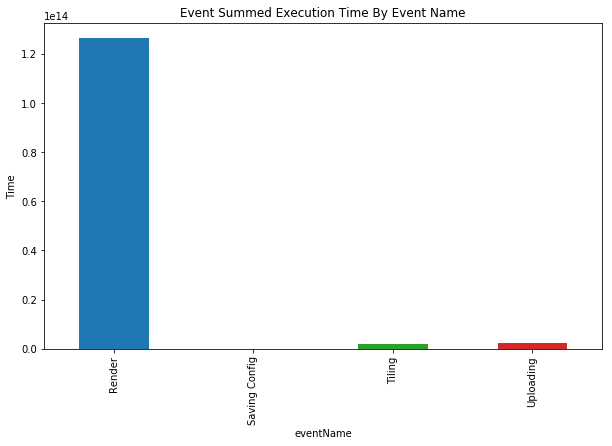

In [12]:
# group by event name (except total) to find execution times
event_deltas = gpu_events_df[gpu_events_df['eventName'] != 'TotalRender'].groupby(
    ['eventName']).apply(lambda x: x.stop_time - x.start_time)

# sum execution times
event_deltas.groupby(['eventName']).sum().plot(kind = 'bar')

plt.ylabel('Time')
plt.title('Event Summed Execution Time By Event Name')
plt.rcParams['figure.figsize'] = [15, 8]

It seems that the GPUs overwhelmingly work on rendering most of their time judging by the number of render events in comparison to other events. Also, it can be noticed that the saving configuration event occurs in  a negligible sum of execution time.

##### Assigned Tasks Per GPU 

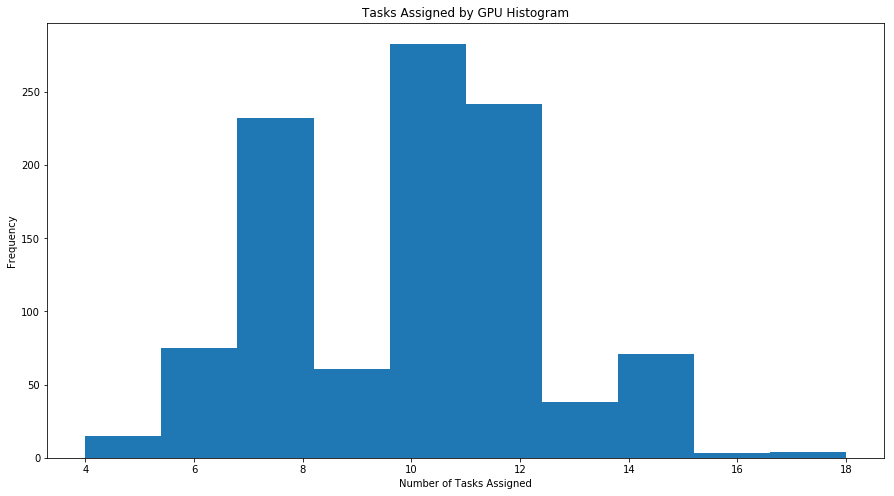

In [19]:
# plot host name frequency (.value_counts) using a histogram

gpu_events_df['hostname'].value_counts().plot(kind = 'hist')
plt.xlabel('Number of Tasks Assigned')
plt.title('Tasks Assigned by GPU Histogram')

plt.rcParams['figure.figsize'] = [15, 8]

plt.savefig('../reports/figures/tasks-histo.png') # save figure
plt.show()

The majority of GPUs are assigned 7, 10, 11 or 12 tasks, however, the assignment isn't consistent as some GPUs handle up to 16-18 tasks and a couple 4, suggesting that the scheduling is not consistent and perhaps could use improvement to ensure load is spread around better.

#### Location and Spread

##### GPU Statistics 

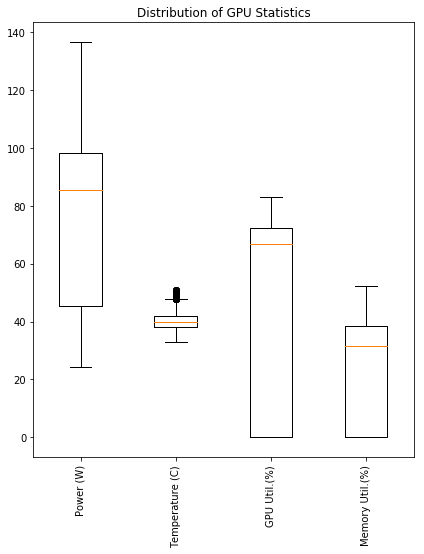

In [13]:
plt.subplot(1, 2, 1)
plt.boxplot([gpu_events_df['powerDrawWatt'], gpu_events_df['gpuTempC'], 
             gpu_events_df['gpuUtilPerc'], gpu_events_df['gpuMemUtilPerc']])
plt.xticks([i+1 for i, _ in enumerate(gpu_stats_labels)],
           gpu_stats_labels, rotation='vertical')
plt.title('Distribution of GPU Statistics')
plt.rcParams['figure.figsize'] = [20, 8]

plt.show()

As can  be seen in the box plot, the GPU utilisation throughout the render runs seems to average right next to 90%, which is a good indication, since it shows that the computation resources are well allocated. However, the memory utilisation averages seems much lower at around 50% with a Inter Quantile Range that is tighter suggesting that memory utilisation is lower more often. This suggests that the rendering task is either non-memory intensive, that the task is not well optimised enough to make use of video memory or that the graphic cards themselves have a lot more memory than needed. 

GPU temperature seems to be clustered tightly around 40C, and the few values that get out of that tight Inter quantile range only reach under 60C and over 25C, and a proportion of values are considered outliers. This shows that the temperature management at the clusters is excellent as this is well beyond maximum operating temperatures of some cards like the Tesla P100 (“NVIDIA Tesla Product Literature,” n.d.), especially considering the high GPU Utilisation.

The power draw averages are just under 100W and with a maximum of 140, which also considering the distance to the maximum power draw from the Q3 range, it seems getting close to 140W is quite unlikely. Overall, the power draw looks excellent as even its maximum is well below some modern top end graphic cards like the Tesla P100 (“NVIDIA Tesla Product Literature,” n.d.).

##### GPU Statistics by Event Name

##### Rendering

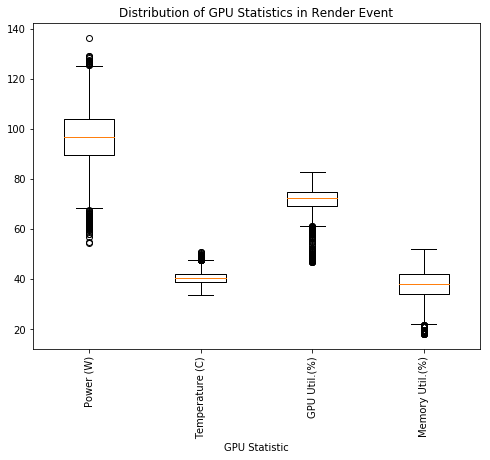

In [25]:
# group by statistic

plt.boxplot(
    [gpu_events_df[gpu_events_df['eventName'] == 'Render']['powerDrawWatt'],
    gpu_events_df[gpu_events_df['eventName'] == 'Render']['gpuTempC'],
    gpu_events_df[gpu_events_df['eventName'] == 'Render']['gpuUtilPerc'],
    gpu_events_df[gpu_events_df['eventName'] == 'Render']['gpuMemUtilPerc']])
 
# setup labels and titles

plt.title('Distribution of GPU Statistics in Render Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats_labels)],
           gpu_stats_labels, rotation='vertical')


# draw plot

plt.rcParams['figure.figsize'] = [8, 6]
plt.show()

During rendering, the GPU statistics distributions are near identical to the overall distributions shown before - which is not surprisingly since rendering occupies most of the events. However, it can noticed that the distributions are generally tighter and have higher medians, in particular with GPU Utlisiation and Memory Utilisation. Power consumptions and temperature levels however are still not exceedingly high and below upper limits of typical GPUs, suggesting that they might not be a bottleneck for most GPUs, but there seems to be a few outliers. 

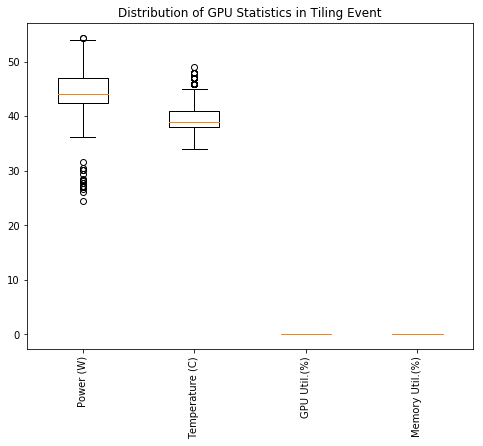

In [23]:
# group by statistic

plt.boxplot(
    [gpu_events_df[gpu_events_df['eventName'] == 'Tiling']['powerDrawWatt'],
    gpu_events_df[gpu_events_df['eventName'] == 'Tiling']['gpuTempC'],
    gpu_events_df[gpu_events_df['eventName'] == 'Tiling']['gpuUtilPerc'],
    gpu_events_df[gpu_events_df['eventName'] == 'Tiling']['gpuMemUtilPerc']])
 
# setup labels and titles

plt.title('Distribution of GPU Statistics in Tiling Event')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats_labels)],
           gpu_stats_labels, rotation='vertical')


# draw plot

plt.rcParams['figure.figsize'] = [8, 6]
plt.show()

GPU and memory utilisation during the tiling events seems to be practically zero. Temperatures are lower and power consumption levels are significantly lower. This suggests that the GPUs are idling during the tiling event, hence it won't be an important event when it comes to bottleneck analysis.

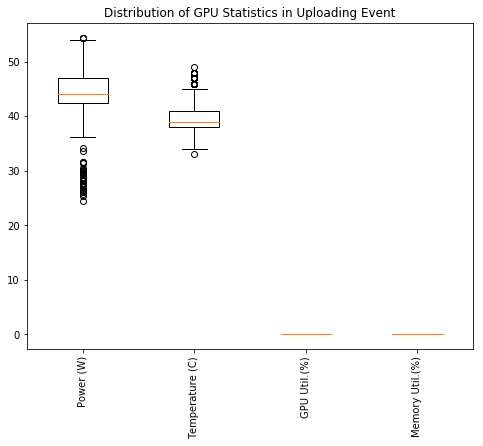

In [27]:
# group by statistic

plt.boxplot(
    [gpu_events_df[gpu_events_df['eventName'] == 'Uploading']['powerDrawWatt'],
     gpu_events_df[gpu_events_df['eventName'] == 'Uploading']['gpuTempC'],
     gpu_events_df[gpu_events_df['eventName'] == 'Uploading']['gpuUtilPerc'],
     gpu_events_df[gpu_events_df['eventName'] == 'Uploading']['gpuMemUtilPerc']])
 
# setup labels and titles

plt.title('Distribution of GPU Statistics in Uploading Event')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats_labels)],
           gpu_stats_labels, rotation='vertical')


# draw plot

plt.rcParams['figure.figsize'] = [8, 6]
plt.show()

The plot here seems nearly identical to the plot with the tiling event, as the GPU looks to be idling according to the low power consumption, low temperatures and near complete lack of utilisation. Hence, like the tiling event, the uploading event will not be crucial during the bottleneck analysis.

### Rendering Performance and Bottleneck Analysis 

As previously stated, the saving configuration events are near negligible due to their rare occurrences. Moreover, the tiling and uploading events do not seem to make use of the GPUs as they seem to be idling during these events. Hence, rendering events need to be analysed when looking bottlenecks. To analyse the rendering performance, rendering times can be used as an indication. To find rendering times we find the execution times by grouping - just as done with the event execution times plot. 

#### Render Execution Times Distribution (General)

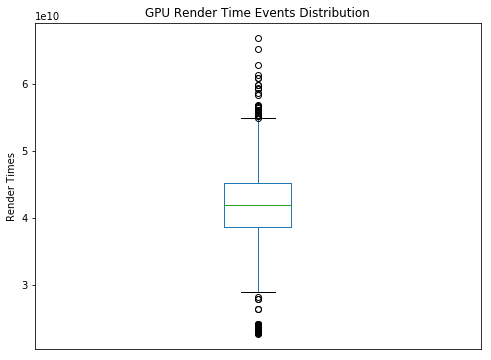

In [9]:
# group by eventname 

render_deltas = gpu_events_df[
    gpu_events_df['eventName'] == 'Render'].groupby(
    ['eventName']).apply(
    lambda x: x.stop_time - x.start_time)

# sum execution times

render_deltas.sum().plot(kind = 'box')

# Labels

# drop x axis
plt.tick_params(axis='x', which='both',
                bottom=False, top=False, labelbottom=False)
plt.title('GPU Render Time Events Distribution')
plt.ylabel('Render Times')

plt.rcParams['figure.figsize'] = [9, 6]

The distribution of render times has a narrow inter quantile range, but a wide minimum to maximum range and a significant number of outliers - in particular above the maximum. This suggests while generally GPUs have consistent performance, there are a couple of GPUs that perform considerably worse.

#### Render Execution Times By Temperature 

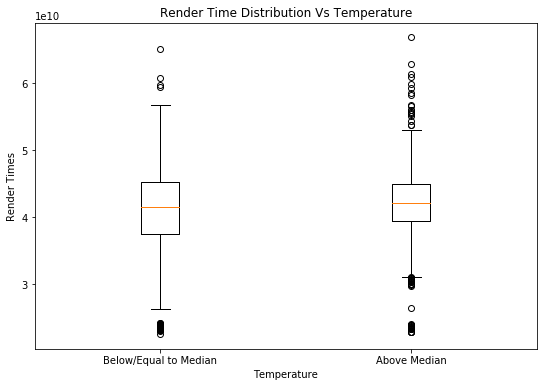

In [10]:
# group by Event below and above median

temp_med = statistics.median(gpu_events_df['gpuTempC'])

render_deltas_under = gpu_events_df[
    (gpu_events_df['gpuTempC'] <= temp_med) & 
    (gpu_events_df['eventName'] == 'Render')].groupby(
    ['eventName']).apply(lambda x: x.stop_time - x.start_time)

render_deltas_over = gpu_events_df[
    (gpu_events_df['gpuTempC'] > temp_med) & 
    (gpu_events_df['eventName'] == 'Render')].groupby(
    ['eventName']).apply(lambda x: x.stop_time - x.start_time)

# sum execution times
plt.boxplot([render_deltas_under.sum(), render_deltas_over.sum()])

# labels
plt.title('Render Time Distribution Vs Temperature')
plt.ylabel('Render Times')
plt.xlabel('Temperature')
plt.xticks([1,2], median_label)

plt.rcParams['figure.figsize'] = [10, 6]

At temperatures go higher than the median, while the average does go up the 3rd quantile does not exceed the 3rd quantile of the other box. However, there is a sudden significant increase of outliers, in particular above the maximum.  

#### Render Execution Times By Power Draw 

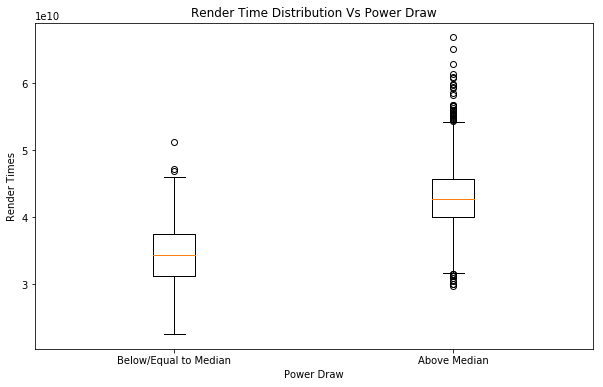

In [21]:
# Group by event below and above median

power_med = statistics.median(gpu_events_df['powerDrawWatt'])

render_deltas_under = gpu_events_df[
    (gpu_events_df['powerDrawWatt'] <= power_med) & 
    (gpu_events_df['eventName'] == 'Render')].groupby(
    ['eventName']).apply(lambda x: x.stop_time - x.start_time)

render_deltas_over = gpu_events_df[
    (gpu_events_df['powerDrawWatt'] > power_med) & 
    (gpu_events_df['eventName'] == 'Render')].groupby(
    ['eventName']).apply(lambda x: x.stop_time - x.start_time)

plt.boxplot([render_deltas_under.sum(), render_deltas_over.sum()])

# labels
plt.title('Render Time Distribution Vs Power Draw')
plt.ylabel('Render Times')
plt.xlabel('Power Draw')
plt.xticks([1,2], median_label)

plt.rcParams['figure.figsize'] = [10, 6]

plt.savefig('../reports/figures/median-power.png') # save figure
plt.show()

This plot is similar to the previous plot, but the increase in quantiles at the "above the median" box is now more noticeable. Perhaps the cooling solution is very effective that the temperature increase is small even with increased power draw. Nonetheless, it seems that the number of outliers goes up significantly again, and in particular above the maximum.

## Conclusions and Data Quality 

To summarise the findings in the exploratory process, it seems that the GPUs spent most of their time rendering compared to other events (e.g. uploading), and the rendering process is the event where the is most utilised. Hence, rendering events proved to be an important factor in the analysis for bottlenecks, as it was the most important task for the GPU. 

When it came to the specific GPU statistics during usage, it seemed that overall the readings for temperatures and power draw were quite impressive when compared to some modern GPUs, which is no surprise considering these chips are required to run for long periods of time. GPU utilisation was also shown to be well executed, as the readings were on the higher ranges (90 %s), especially when rendering. However, the GPU memory utilisation - an important factor for bottlenecking as stated in the Business Understanding - was comparatively low, suggesting that viedo memory resources were perhaps not well utilised, which might have caused bottlenecking. One last interesting observation regrading GPU statistics, is that the some cards seem to have their render times at higher temperatures and power draws scale significantly more than others, suggesting that the cards seem to have different tolerances to voltage and temperature, perhaps causing slowdown.  

The scheduling of tasks, while on average slightly balanced, seemed to have made a couple cards that carry significantly less tasks than others (e.g. 4 compared to 18!). This suggests, that the scheduling could also been a bottleneck itself by assigning certain cards to do more work than others.

When it comes to the data quality, two important issues need to be raised:

* The GPU memory usage is in percentages, which gives little indication on how much memory being used exactly. This makes it difficult to judge whether the lack of memory utilisation is caused by poor optimisation of resources, the task not being memory intensive or the GPUs themselves having more memory than needed.

* The GPU statistics were averaged throughout the task execution during the merged process, which might have hid some variation during the execution of the tasks themselves. 

## Evaluation of Data Mining Process  

### Business Success Criteria and Future Work

* Analyse how well the cloud application parallelises the workload
    - This was done on two levels, both when it comes the utilisation in the GPU itself and the scheduling of tasks.
* Measure and analyse memory usage
    - This was done via an analysis of memory utilisation percentages, however as stated in the data quality conclusions the analysis is not conclusive due to the lack of units.
* Measure how well the GPUs respond to varying data scales and loads
    - This was done by the analysis of GPU statistics scaling through different events and the scaling of rendering times through GPU statistics. However, perhaps an analysis of scaling in the tasks themselves (tiles) might have also been necessary. Moreover, the statistics were reliant on averages through tasks, which might have removed some variation.
    
Overall, the project seemed to have met most of its criteria and provided a lot interesting outlooks on bottlenecks, but further  memory analysis with more memory statistics, analysis of tiling scaling and with in task variation analysis might be considered in future projects.


### Techniques and Tools 

While this project carried over a lot of familiar tools and processes used in previous projects (e.g. CRISP-DM, Git), which proved to proved the base process and the version control backup/archive for this project well, there was major change to new environment.

This project was undertaken over a Cookie Cutter Data Science template over a python based environment, an environment which while successfully provided new more controllable tools (e.g. virtual environments for isolation), it also proved to be challenging. As, unlike R based solutions used before like Project Template, some solutions in this environment like the Cookie Cutter templates require more hacking (e.g. no automatic dataset loading from .csv files). The extra hacking proved to be a hindrance in the project and might have lead to some delays, however it provided useful tools that will be used in future projects. 

Lastly, an issue was faced in this project regrading the CRISP-DM model followed. In previous projects, the Data Preparation stage was done before the Data Understanding stage, but when used in this project the lack of clarity on the dataset lead to some parts of the project taking too long (e.g. the merge/grouping between the GPU dataset and the tasks-events) due to a poor understanding of the data. Hence in future projects a slimmed down Data Understanding stage might be added before the data preparation.

## References

1. NVIDIA Tesla Product Literature [WWW Document], n.d. . NVIDIA. URL https://www.nvidia.com/en-us/data-center/tesla-product-literature/ (accessed 1.24.19).